In [2]:
import pandas as pd

folder = 'fake'
flights_path = '/home/eduardo/Documents/Projetos/AED2324_PRJ2_G19/dataset/' + folder + '/flights.csv'
airports_path = '/home/eduardo/Documents/Projetos/AED2324_PRJ2_G19/dataset/' + folder + '/airports.csv'
airlines_path = '/home/eduardo/Documents/Projetos/AED2324_PRJ2_G19/dataset/' + folder + '/airlines.csv'

df_flights = pd.read_csv(flights_path)
df_airports = pd.read_csv(airports_path)
df_airlines = pd.read_csv(airlines_path)


In [24]:
df_filter = df_flights

#df_merged = pd.merge(df_filter, df_airports[['Code','Country']], left_on='Target', right_on='Code', how='left')
#df_merged = df_merged[['Source','Target','Country']]

qtd_distinct = df_filter.nunique().iloc[2] # Country column

df_filter = df_filter.drop_duplicates(subset=['Airline'])

print(df_filter)

print("Number of airlines:", qtd_distinct)

   Source Target Airline
0     GRU    PRA     AAA
2     GRU    JFK     ABB
3     GRU    JFK     ABC
4     GRU    JFK     ABD
8     JFK    LHR     BBA
9     JFK    LHR     BBB
10    JFK    YQK     BBC
12    LHR    YQK     CCB
15    YQK    TJM     DDA
16    FNC    CIY     OPO
Number of airlines: 10


In [5]:
count_cities = df_airports.groupby(['City', 'Country']).size().reset_index(name='Count')
count_cities = count_cities[count_cities['Count'] > 1]
count_cities = count_cities.sort_values(by=['Count'], ascending=False)


print(count_cities)

Empty DataFrame
Columns: [City, Country, Count]
Index: []


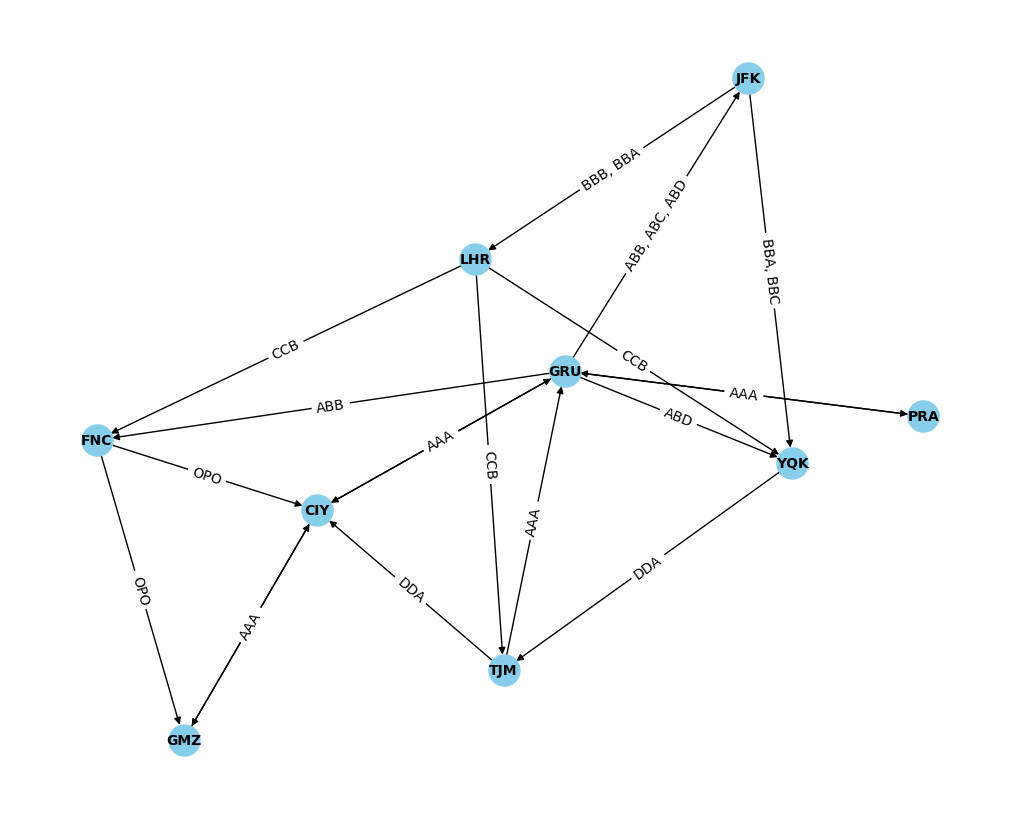

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

vertices_df = pd.read_csv(airports_path)
edges_df = pd.read_csv(flights_path)

#edges_df = edges_df.loc[edges_df['Source'] != 'LHR']
#edges_df = edges_df.loc[edges_df['Target'] != 'LHR']

G = nx.DiGraph()

for _, vertex in vertices_df.iterrows():
    G.add_node(vertex['Code'], label=vertex['Code'])

for _, edge in edges_df.iterrows():
    source = edge['Source']
    target = edge['Target']
    airline = edge['Airline']

    if G.has_edge(source, target):
        G[source][target]['airlines'].add(airline)
    else:
        G.add_edge(source, target, airlines={airline})

pos = nx.spring_layout(G)  
edge_labels = {(source, target): ', '.join(airlines) for source, target, airlines in G.edges(data='airlines')}

plt.figure(figsize=(10, 8))

nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', arrowsize=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()